# Forecasting Stock Prices
## Monte Carlo Simulations Based on Historical Data

#### PYTHON VERSION

In [1]:
import sys
print(sys.version)

3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]


### MC Asset Pricing
The basic recursive formula used for the purposes of this exercise:
\begin{align*}
\text{PriceToday}&=\text{PriceYesterday} \times e^r \\
\text{PriceToday}&=\text{PriceYesterday} \times e^{\text{ln}\frac{\text{PriceToday}}{\text{PriceYesterday}}} \\
\end{align*}
where <B>r</B> is the <A HREF="https://en.wikipedia.org/wiki/Rate_of_return"><B>logarithmic return</B></A>.

The aforementioed formula can be further broken down to two components:
\begin{equation*}\text{PriceToday}=\text{PriceYesterday} \times e^{\underbrace{\mu -\frac{\sigma^2}{2}}_{\text{drift}} \quad + \quad \underbrace{\sigma \mathbf{Z}(\text{Rand[0,1]})}_{\text{volatility}}}.\end{equation*}

In [2]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

ticker = 'MSFT' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2000-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

drift.values
stdev.values

t_intervals = 250
iterations = 100

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

Create a variable S0 equal to the last adjusted closing price of Microsoft. Use the “iloc” method.

In [3]:
S0 = data.iloc[-1]
S0

MSFT    334.690002
Name: 2021-12-23 00:00:00, dtype: float64

Create a variable price_list with the same dimension as the daily_returns matrix. 

In [4]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Set the values on the first row of the price_list array equal to S0.

In [6]:
price_list[0] = S0
price_list

array([[334.69000244, 334.69000244, 334.69000244, ..., 334.69000244,
        334.69000244, 334.69000244],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

Create a loop in the range (1, t_intervals) that reassigns to the price in time t the product of the price in day (t-1) with the value of the daily returns in t.

In [7]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [8]:
price_list

array([[334.69000244, 334.69000244, 334.69000244, ..., 334.69000244,
        334.69000244, 334.69000244],
       [344.5668824 , 333.35098068, 322.23933913, ..., 346.10324323,
        334.5845132 , 336.60561204],
       [350.493232  , 338.65351344, 308.97403975, ..., 350.36539359,
        349.47454127, 331.13840235],
       ...,
       [510.34571445, 312.74118737, 335.10524671, ..., 239.96497334,
        672.77853318, 273.10499118],
       [508.59371155, 310.3906352 , 347.97336933, ..., 242.27824654,
        651.34965619, 273.70476316],
       [504.35765714, 315.67521823, 348.96444395, ..., 243.85288967,
        670.10055886, 276.70870288]])

Finally, plot the obtained price list data.

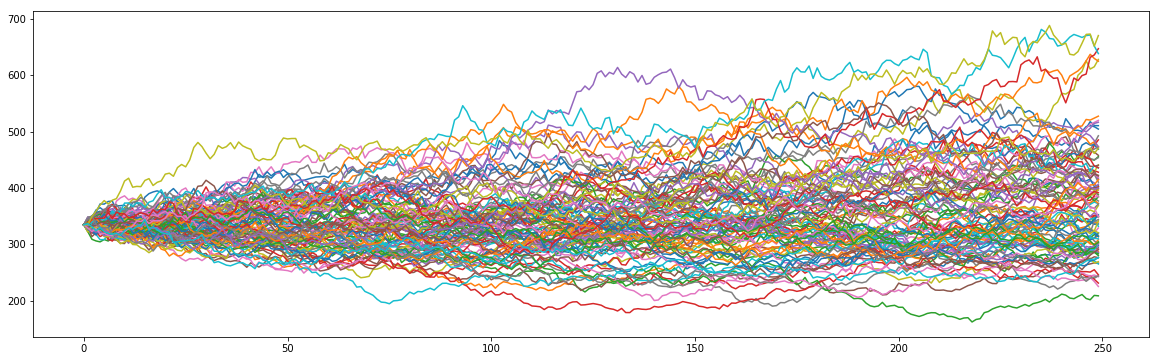

In [9]:
plt.figure(figsize=(20,6))
plt.plot(price_list);